**Import Libraries :**

In [112]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


**Data Preprocessing :**

In [113]:

disease_df = pd.read_csv("/content/drive/MyDrive/heartdataset.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)


In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)


**Train and Test :**

In [116]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


<ipython-input-117-22dca55f9c4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


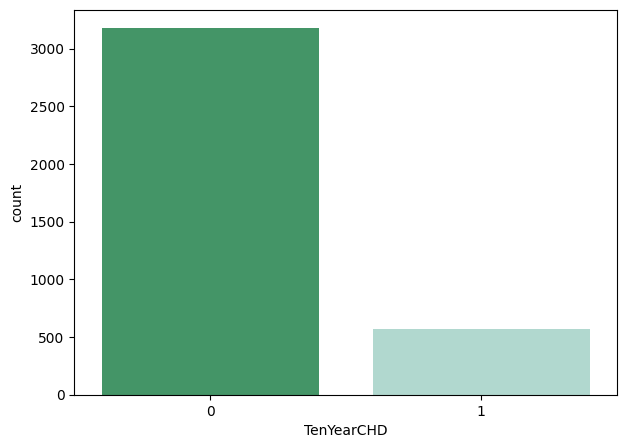

In [117]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

**Model Training and Evaluation :**

Logistic Regression Training Accuracy: 0.8544761904761905
Logistic Regression Testing Accuracy: 0.8490230905861457


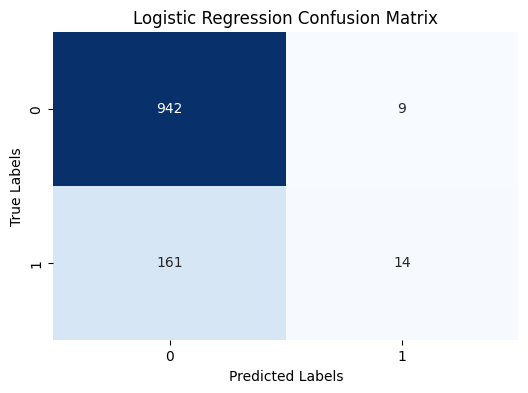

Naive Bayes Training Accuracy: 0.8403809523809523
Naive Bayes Testing Accuracy: 0.8321492007104796


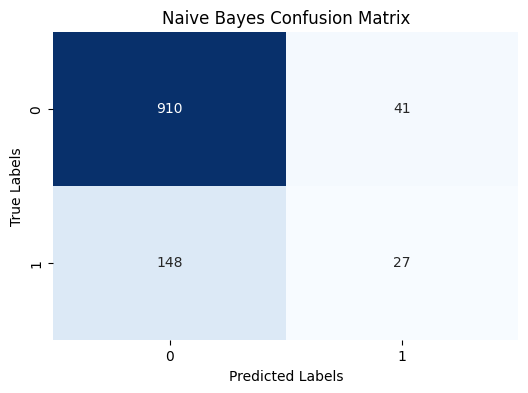

K-Nearest Neighbors Training Accuracy: 0.8689523809523809
K-Nearest Neighbors Testing Accuracy: 0.8303730017761989


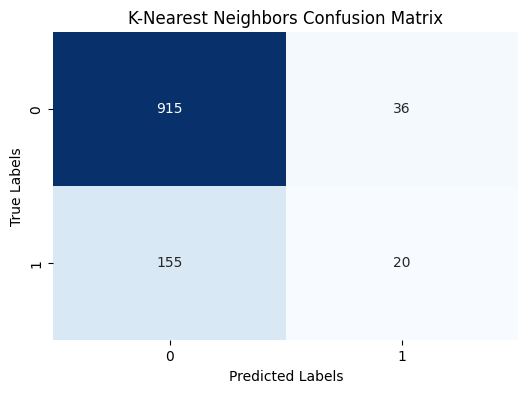

Random Forest Training Accuracy: 0.9051428571428571
Random Forest Testing Accuracy: 0.8410301953818827


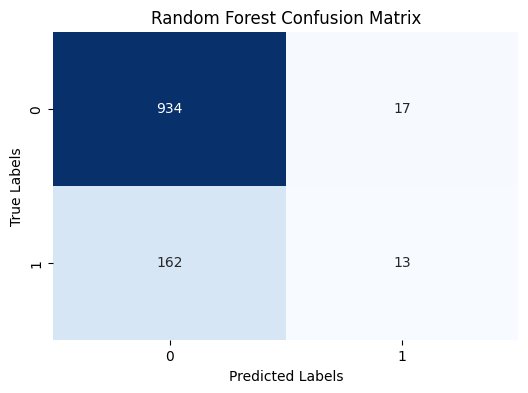

In [118]:
# Function to train, evaluate model, and plot confusion matrix
def train_evaluate_and_plot(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'{model_name} Training Accuracy:', train_accuracy)

    # Testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{model_name} Testing Accuracy:', test_accuracy)

    # Plot confusion matrix for test set
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Models and names
models = [
    (LogisticRegression(C=0.5), "Logistic Regression"),  # Increased regularization
    (GaussianNB(), "Naive Bayes"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (RandomForestClassifier(n_estimators=50, max_depth=10, random_state=4), "Random Forest")  # Reduced complexity
]

# Training, evaluating, and plotting for each model
for model, name in models:
    train_evaluate_and_plot(model, name, X_train, y_train, X_test, y_test)
